## Etapa 1: Importar bibliotecas, carregar e estudar os dados

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

Matplotlib is building the font cache; this may take a moment.


In [ ]:
df = pd.read_csv('../data/videogame_dataset.csv')
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
625,Mario Party 4,GC,2002.0,Misc,1.13,0.36,0.92,0.07,70.0,7.4,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
3175,LEGO Star Wars II: The Original Trilogy,X360,2006.0,Action,0.55,0.03,0.00,0.05,81.0,8,E10+
2378,Spec Ops: Ranger Elite,PS,2001.0,Shooter,0.49,0.33,0.00,0.06,48.0,6.6,T
5789,Shin Megami Tensei: Devil Summoner - Soul Hackers,3DS,2012.0,Role-Playing,0.13,0.02,0.14,0.01,NaN,NaN,NaN
6453,The Incredible Hulk,PS3,2008.0,Action,0.22,0.02,0.00,0.02,55.0,6.8,T
6245,Ice Age: Dawn of the Dinosaurs,Wii,2009.0,Action,0.11,0.14,0.00,0.03,75.0,8.3,E10+
12915,Samurai Warriors 4-II,PSV,2015.0,Action,0.00,0.00,0.05,0.00,NaN,tbd,T
13978,Minna no Chizu,PSP,2006.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13473,Activision Anthology,GBA,2003.0,Misc,0.03,0.01,0.00,0.00,79.0,tbd,E


<!-- ## Etapa 2: Preparar os dados para análise -->

## Etapa 2: Preparar os dados para análise

Após análise inicial do dataset, as classificações abaixo foram criadas para garantir consistência, padronização e preparo adequado dos dados para as etapas subsequentes da análise.

#### Certezas:
- Padronizar nomes das colunas para letras minúsculas usando .lower() para facilitar a manipulação e manter consistência.
- Renomear other_sales para row_sales para refletir corretamente seu significado.
- Converter year_of_release de float para int, removendo previamente as poucas linhas com NaN para preservar integridade.
- Tratar a coluna user_score:
    - substituir 'tbd' por NaN, já que ambos representam ausência de avaliação,
    - converter para float,
    - utilizar -1 como placeholder temporário para valores ausentes, visando manter o tipo numérico para análises futuras.
- Criar a coluna global_sales somando as vendas de todas as regiões.

#### Talvez:
- Coluna rating (ESRB): manter os valores originais, mas possivelmente utilizar um dicionário descritivo ao gerar gráficos.
- Manter valores de vendas em milhões de dólares para evitar números muito extensos; revisar apenas se a forma de visualização exigir ajustes.

#### Reavaliar:
- Escalas de score (user e critic): decidir entre padronizar ambas para 0–10, 0–100 ou outra escala comum, dependendo do uso futuro nas análises.
- Tratamento de valores ausentes nas colunas de score e rating: avaliar se devem ser excluídos, mantidos ou preenchidos (média/mediana), conforme a relevância futura.

In [12]:
game_df = df.copy()
# colunas com nome minúsculo
game_df.columns = game_df.columns.str.lower()
# renomeando coluna other_sales
game_df = game_df.rename(columns={"other_sales": "row_sales"})
# lidando com os nulos e convertendo o dtype da coluna year_of_release
game_df = game_df.dropna(subset=["year_of_release"]).reset_index(drop=True)
game_df["year_of_release"] = game_df["year_of_release"].astype("int")
# substituindo os tbds por NaNs e convertendo o dtype da coluna user_score
game_df["user_score"] = game_df["user_score"].where(game_df["user_score"] != 'tbd', np.nan)
game_df["user_score"] = game_df["user_score"].astype("float")
# criando coluna com as vendas totais por jogo 
game_df['global_sales'] = game_df[["na_sales", "eu_sales", "jp_sales", "row_sales"]].sum(axis=1)
# reorganizando as colunas para ter as colunas de sales lado a lado
cols = list(game_df.columns) 
row_index = cols.index('row_sales') 
col_to_move = cols.pop(cols.index('global_sales'))
cols.insert(row_index + 1, col_to_move)
game_df = game_df[cols]

game_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,row_sales,global_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


In [13]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   row_sales        16446 non-null  float64
 8   global_sales     16446 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           9768 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# # COLUNA DE RATING - caso precise alterá-la/complementá-la para o reporte final
# rating_labels = {
#     "EC": "Early Childhood",
#     "E": "Everyone",
#     "E10+": "Everyone 10+",
#     "T": "Teen",
#     "M": "Mature 17+",
#     "AO": "Adults Only 18+",
#     "RP": "Rating Pending",
#     "K-A": "Kids to Adults"    
# }

# df['rating_clean'] = df['rating'].fillna("Unknown")
# df['rating_label'] = df['rating'].map(rating_labels)

As transformações aplicadas priorizaram integridade e coerência dos dados, garantindo que o dataset esteja pronto para análises posteriores. Ajustes adicionais foram deixados em aberto de forma intencional, dependendo da relevância dessas variáveis nos próximos estágios.

## Etapa 3: Analisar os dados

In [15]:
game_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,row_sales,global_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN


#### A) Veja quantos jogos foram lançados a cada ano. Os dados de cada período são significativos?

Os dados do dataset mostram um grande aumento no lançamento de jogos a partir dos anos 2000, com pico entre 2008-2010. Os anos anteriores são menos representativos, com 25% deles registrando 36 jogos ou menos. A diferença entre mediana (338) e média (444) indica uma distribuição assimétrica, puxada pelos anos com maior registros. Para evitar viés negativos na análise, os próximos passos devem concentrar-se no período de dados do dataset em que os lançamentos de jogos é maior e mais estável (anos 2000+).

In [38]:
games_per_year = (
    game_df
    .groupby('year_of_release')
    .size()
    .reset_index(name='games_count')
    .sort_values('games_count')
)

display(games_per_year.head(10))
games_per_year.describe().round(2)

,year_of_release,games_count
0,1980,9
4,1984,14
5,1985,14
8,1988,15
10,1990,16
7,1987,16
9,1989,17
3,1983,17
6,1986,21
2,1982,36


,year_of_release,games_count
count,37.00,37.00
mean,1998.00,444.49
std,10.82,451.56
min,1980.00,9.00
25%,1989.00,36.00
50%,1998.00,338.00
75%,2007.00,762.00
max,2016.00,1427.00


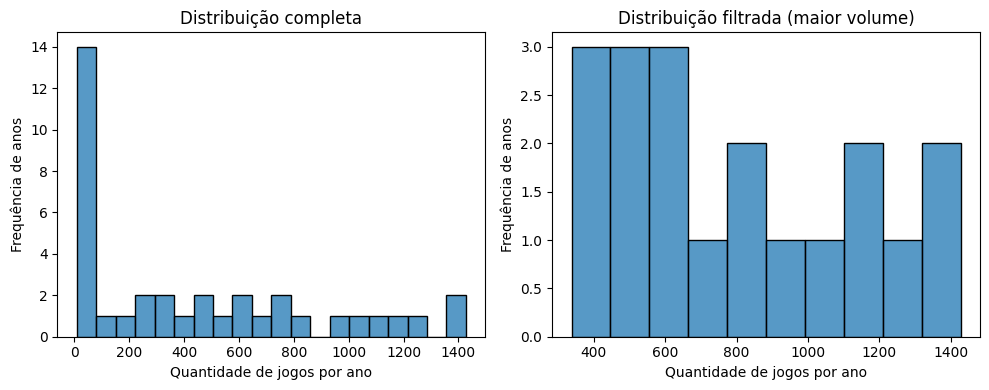

In [ ]:
# criando histogramas com todos os dados do dataset e com filtro a partir da mediana
# criando o filtro
threshold = games_per_year["games_count"].median()
top_years = games_per_year[games_per_year["games_count"] >= threshold]

# criando os histogramas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# todos os dados
sns.histplot(
    data=games_per_year,
    x="games_count",
    bins=20,
    ax=axes[0]
)
axes[0].set_title("Distribuição completa (37 anos)")
axes[0].set_xlabel("Quantidade de jogos por ano")
axes[0].set_ylabel("Frequência de anos")

# dados filtrados
sns.histplot(
    data=top_years,
    x="games_count",
    bins=10,
    ax=axes[1]
)
axes[1].set_title("Distribuição filtrada (18 anos)")
axes[1].set_xlabel("Quantidade de jogos por ano")
axes[1].set_ylabel("Frequência de anos")

plt.tight_layout()
plt.show()


A diferença visual entre os histogramas se dá pela quantidade do conjunto de dados. O histograma completo inclui todos os anos disponíveis (37), enquanto o histograma filtrado contém apenas os anos com volume acima da mediana (~18), por isso o gráfico filtrado naturalmente apresenta frequências menores. Essa diferença é esperada e reforça o motivo da filtragem: os anos de menor volume distorcem a distribuição e não são representativos para análises comparativas.

#### B) Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base nos dados para cada ano. Encontre as plataformas que costumavam ser populares, mas que agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

#### C) Determine para qual período você deve pegar dados. Para fazer isso, olhe para suas respostas das perguntas anteriores. Os dados devem permitir que você construa um modelo para 2017.
#### Trabalhar apenas com os dados que você decidiu que são relevantes. Desconsidere os dados de anos anteriores.

#### D) Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

#### E) Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

#### F) Veja como as avaliações de usuários e profissionais afetam as vendas de uma das plataformas populares (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre avaliações e vendas.


#### G) Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.


#### H) Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

### Conclusões gerais:

## Etapa 4: Criar um perfil para cada região e analisá-los

## Etapa 5: Testar as hipóteses

## Etapa 6: Conclusão geral